In [3]:
# import pandas and read the csv file that conatin sell items and price
import pandas as pd
from datetime import datetime
import random
import string
product = pd.read_csv("test1.csv")
price = 0
products = ""
df_survey = pd.DataFrame(columns=['name', 'children_age', 'children_gender', 'toy_type', 'toy_preference'])


In [37]:
# Market research scenario

class MarketResearchChatbot:
    
    # Constructor method to initialize the user_data dictionary
    def __init__(self):
        self.user_data = {}

    # Method to start the survey by collecting name and date of birth
    def start_survey(self):
        print("Chatbot: Can you first provide your name(English full name) and then date of birth(MM-DD-YYYY) for verification please?")
        name = input("You: ")
        dob = input("You: ")
        self.user_data["name"] = name
        print(f"Chatbot: Thank you {name}, your verification process is completed.")
        
        # Proceed to collect children's information
        self.collect_children_info()

    # Method to collect information about the children such as age and gender
    def collect_children_info(self):
        print("Chatbot: Can you input your children's age(Integer)?")
        age = input("You: ")
        self.user_data["children_age"] = age
        print(f"Chatbot: Thank you {self.user_data['name']}, can you input the gender of your children(Male/Female)?")
        gender = input("You: ")
        self.user_data["children_gender"] = gender
        
        # Proceed to ask about toy preferences
        self.choose_toy_preference()

    # Method to determine the type of toys the children prefer
    def choose_toy_preference(self):
        print("Chatbot: Can you tell me which type of toy does your children like most?")
        print("Chatbot: Choose the number from the following options(1, 2, 3):")
        print("1: Brain Flakes\n2: Stuffed Animals\n3: Active Play")
        choice = input("You: ")

        # Based on the choice, provide further options for the user
        if choice == '1':
            self.user_data["toy_type"] = "Brain Flakes"
            print("Chatbot: Please choose the name from the following Brain Flakes options:")
            print(" Brain Flakes Building Sets\n Brain Flakes Building Resources")
        elif choice == '2':
            self.user_data["toy_type"] = "Stuffed Animals"
            print("Chatbot: Please choose the name from the following Stuffed Animals options:")
            print(" Pets\n Farm Animals\n Aquatic Animals\n Tiger Tale Toys Stories\n Wild Animals\n Backpacks and Wall Mounts")
        elif choice == '3':
            self.user_data["toy_type"] = "Active Play"
            print("Chatbot: Please choose the name from the following Active Play options:")
            print(" Goodminton\n Exercise\n Surfminton")
        else:
            print("Chatbot: I'm sorry, I didn't understand your choice.")

        option_choice = input("You: ")
        self.user_data["toy_preference"] = option_choice
        
        # Finish the survey and display the results
        self.finish_survey()

    # Method to conclude the survey and display the collected data
    def finish_survey(self):
        print("Chatbot: Thank you for participating in the survey, we value your feedback. Have a nice day!")
        print("Chatbot: Survey Results:")
        print(self.user_data)
        return self.user_data

# Outside of the class definition

# Create an instance of the chatbot
chatbot = MarketResearchChatbot()

# Start the survey for the chatbot instance
chatbot.start_survey()

# After completing the survey, append the collected user data to an existing DataFrame named df_survey
df_survey=df_survey.append(chatbot.user_data, ignore_index=True)

Chatbot: Can you first provide your name(English full name) and then date of birth(MM-DD-YYYY) for verification please?
You: tony
You: 12-08-1997
Chatbot: Thank you tony, your verification process is completed.
Chatbot: Can you input your children's age(Integer)?
You: 4
Chatbot: Thank you tony, can you input the gender of your children(Male/Female)?
You: male
Chatbot: Can you tell me which type of toy does your children like most?
Chatbot: Choose the number from the following options(1, 2, 3):
1: Brain Flakes
2: Stuffed Animals
3: Active Play
You: 1
Chatbot: Please choose the name from the following Brain Flakes options:
 Brain Flakes Building Sets
 Brain Flakes Building Resources
You: dd
Chatbot: Thank you for participating in the survey, we value your feedback. Have a nice day!
Chatbot: Survey Results:
{'name': 'tony', 'children_age': '4', 'children_gender': 'male', 'toy_type': 'Brain Flakes', 'toy_preference': 'dd'}


C:\Users\Tony\AppData\Local\Temp\ipykernel_6832\2150458319.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_survey=df_survey.append(chatbot.user_data, ignore_index=True)


In [38]:
df_users = pd.DataFrame(columns=['userid', 'usertype', 'Kid_Age', 'Kid_Gender', 'Discount_Code', 'Institution_Type'])


In [41]:
# Member Register scenario

# Create an empty dataframe for storing user details

def get_and_add_username():
    """
    Function to interactively get a username from the user and add it to the dataframe if it's unique.
    """
    while True:
        username_input = input("Please create a username: ")
        if username_input.lower() in df_users['userid'].values:
            print("Username already exists. Please choose another one.")
            continue
        else:
            # If the username is unique, add it to the dataframe with other fields as NaN for now
            user=username_input
            print(f"Username '{username_input}' has been successfully added.")
            return user

def choose_account_type():
    """
    Interactively determine the type of account a user wants to create: Regular or Wholesaler.
    """
    while True:
        # Ask user about the type of account they want to create
        account_type = input("Are you interested in a regular account or a wholesaler account? (Regular/Wholesaler): ")
        # Check if provided input is valid
        if account_type.lower() not in ['regular', 'wholesaler']:
            print("Invalid choice. Please choose either 'Regular' or 'Wholesaler'.")
            continue
        # If the user chooses a wholesaler account
        if account_type.lower() == 'wholesaler':
            # Ask if they are interested in making a purchase over $200
            order_amount = input("Are u interested in making a purchase over $200? Y/N: ")
            
            # Check if provided input is valid
            if order_amount.lower() not in ['y', 'n']:
                print("Invalid choice. Please choose again.")
                continue
            # If the user is not interested in making a large purchase
            elif order_amount.lower() == 'n':
                print('You are not eligible for a wholesaler account, but you are welcomed to continue as a regular member!')
                return 'regular'  # Return 'regular' as the account type
            else:
                print("Congratulations! You are registered as a wholesaler.")
                return 'wholesaler'  # Return 'wholesaler' as the account type
        else:
            # If the user chooses a regular account
            print("Congratulations! You are registered as a regular member.")
            return 'regular'  # Return 'regular' as the account type
        
def questionare():
    """
    Ask further questions based on the account type chosen by the user.
    """
    # Get the chosen account type
    account = choose_account_type()
    # If the user has chosen a regular account
    if account == 'regular':
        # Ask about their kid's age
        age = int(input("What's your kid's age? "))
        # Ask about their kid's gender and ensure the input is valid
        gender = input("What's your kid's gender? (Male/Female/Other): ")
        while gender.lower() not in ['male', 'female', 'other']:
            print("Invalid choice. Please choose either 'Male', 'Female', or 'Other'.")
            gender = input("What's your kid's gender? (Male/Female/Other): ")
        # Generate a random discount code for the user
        discount_code = ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
        print(f"Congratulations! You have received a 10% discount code for your orders: {discount_code}")
        # Return relevant details
        return account, age, gender, discount_code, None
    else:
        # If the user has chosen a wholesaler account, ask about their institution type and ensure the input is valid
        while True:
            institution_type = input("What kind of institution do you work for? (Education/Retailer/Startup): ")
            if institution_type.lower() not in ['education', 'retailer', 'startup']:
                print("Invalid choice. Please choose either 'Education', 'Retailer', or 'Startup'.")
                continue
            else:
                print("Thank you! You can enjoy the wholesaler discount on all orders.")
                # Return relevant details
                return account, None, None, None, institution_type.lower()


def register():
    user=get_and_add_username()
    account,age, gender, discount_code, institution_type=questionare()
    df_users.loc[len(df_users)] = [user,account,age, gender, discount_code, institution_type]
    return None

register()

Please create a username: steve
Username 'steve' has been successfully added.
Are you interested in a regular account or a wholesaler account? (Regular/Wholesaler): regular
Congratulations! You are registered as a regular member.
What's your kid's age? 3
What's your kid's gender? (Male/Female/Other): male
Congratulations! You have received a 10% discount code for your orders: GFW4LX


In [43]:
data_to_insert = {
    'userid': ['tony', 'steve'],
    'usertype': ['wholesaler', 'regular'],
    'Kid_Age': [None, 3],
    'Kid_Gender': [None, 'male'],
    'Discount_Code': [None, 'GFW4LX'],
    'Institution_Type': ['startup', None]
}

df_users = pd.DataFrame(data_to_insert)
df_users



,userid,usertype,Kid_Age,Kid_Gender,Discount_Code,Institution_Type
0,tony,wholesaler,NaN,None,None,startup
1,steve,regular,3.0,male,GFW4LX,None


In [21]:
df_transactions = pd.DataFrame(columns=[
    'Date_of_Transaction',
    'Username',
    'Purchasing_Amount',
    'Products'
])

sample_data = {
    'Date_of_Transaction': [pd.Timestamp('2023-08-01').date(), pd.Timestamp('2023-08-05').date(), pd.Timestamp('2023-08-06').date()],
    'Username': ['tony', 'steve', 'steve'],
    'Purchasing_Amount': [100, 200, 150],
    'Products': ['productA', 'productB', 'productC']
}
df_transactions = pd.DataFrame(sample_data)
df_transactions



,Date_of_Transaction,Username,Purchasing_Amount,Products
0,2023-08-01,tony,100,productA
1,2023-08-05,steve,200,productB
2,2023-08-06,steve,150,productC


In [33]:
# Define a dictionary with predefined responses for certain keywords
scenario = {
 "shipping policy": "$10 across Canada",
"hi": "Hello! Welcome to viahart we sell..... What can I do for you?",
"how are you": "I'm good, thanks for asking!",
"what are the offering": "We are offering $200 -$500 free shipping ...",
"default": "I'm sorry, I don't understand what you're saying."
}

# Create a function to handle user inputs
def chatbot_response(user_input, scenario):
    for keyword in scenario:
        if keyword in user_input.lower():
            return scenario[keyword]
    return scenario["default"]

# Start the chatbot
print("Chatbot: Hi, how can I help you today?")
while True:
    user_input = input("You:")
    if user_input.lower() == "bye":
        print("Chatbot: Goodbye!")
        break
    elif user_input.lower() == "i want to buy sth":
        print("What product do you want to buy: ")
        # make all the selling items in an array
        items = product['ITEM'].values
        print(items)
        user_input = input()
        while True:
            if user_input.lower() == "no":
                # shipping price
                price = price + 10
                print("Here is the price of all the product with shipping " + str(price))
                user_name = input('Please provide your user_name. You can type NA if you don\'t have one. ')
                break
            elif user_input in items:
                price = price + product[product['ITEM'] == user_input]["PRICE"].item()
                products = products+", "+str(user_input)
                user_input = input("Is there any thing else you want to add, if so please just say the item name, other wise say no")
            else:
                user_input = input("Sorry I cant understand, please just say the item name, other wise say no")
        while True:
            if user_name not in df_users['userid'].values and user_name!='NA':
                user_name = input('I am sorry. Please provide your user_name. You can type NA if you don\'t have one. ')
            else:
                break
        # different discount policies for different users
        if user_name!='NA'and df_users[df_users['userid'] == user_name]['usertype'].iloc[0] == 'regular':
            price = price - 10
            print("Congress. As a regular member you are eligible for free shipping so your price will be " + str(price))
        elif user_name=='NA':
            print("Here is the price of all the product with shipping " + str(price)+'. Create a member for more discounts.')
        elif user_name!='NA'and price >= 200 and price <= 500 and df_users[df_users['userid'] == user_name]['usertype'].iloc[0] == 'wholesaler':
            price = price - 10
            print("Congress. You are eligible for free shipping so your price will be " + str(price))
        elif user_name!='NA'and price > 500 and price <= 1000 and df_users[df_users['userid'] == user_name]['usertype'].iloc[0] == 'wholesaler':
            price = price - 10
            price = price * 0.92
            print("Congress You are eligible for free shipping and 8% off as a wholesaler so your price will be " + str(price))
        elif price<200 and  df_users[df_users['userid'] == user_name]['usertype'].iloc[0] == 'wholesaler':
            print("Your total is " + str(price))
        elif user_name!='NA'and  price > 1000 and df_users[df_users['userid'] == user_name]['usertype'].iloc[0] == 'wholesaler':
            price = price - 10
            price = price * 0.84
            print("Congress You are eligible for free shipping and 16% off as a wholesaler so your price will be " + str(price))
        print("Chatbot: What else can I do for you?") 

    else:
        print("Chatbot: " + chatbot_response(user_input,scenario))
    df_transactions.loc[len(df_transactions)] = [datetime.now().date(),user_name,price,products]
    price = 0
    products = ""

Chatbot: Hi, how can I help you today?
You:i want to buy sth
What product do you want to buy: 
['Brain Flakes Building Sets' 'Aquatic Animals' 'Tiger Tale Toys Stories']
Brain Flakes Building Sets
Is there any thing else you want to add, if so please just say the item name, other wise say nono
Here is the price of all the product with shipping 160
Please provide your user_name. You can type NA if you don't have one. steve
I am sorry. Please provide your user_name. You can type NA if you don't have one. steve
I am sorry. Please provide your user_name. You can type NA if you don't have one. na
I am sorry. Please provide your user_name. You can type NA if you don't have one. NA
Here is the price of all the product with shipping 160. Create a member for more discounts.
Chatbot: What else can I do for you?
You:bye
Chatbot: Goodbye!


In [29]:


#Function to calculate the number of days since the last order of a user
def days_since_last_order(username, df):
    # Filter for the specific username
    user_data = df[df['Username'] == username]
    
    # Sort by Date_of_Transaction and get the most recent date
    last_order_date = user_data.sort_values('Date_of_Transaction', ascending=False).iloc[0]['Date_of_Transaction']
    
    # Calculate the difference between this date and today's date
    days_difference =(datetime.now().date() - last_order_date).days
    
    return days_difference


def handle_multiple_orders(username, df):
    # Filter the dataframe for the given username
    user_data = df[df['Username'] == username]
    
    # Check if the user has multiple records
    if len(user_data) > 1:
        # Print all order details
        print("Here are all your orders:")
        print(user_data)
        
        # Ask the user for input
        choice = input("Do you want to process the most recent one or others? (Enter 'recent' or 'others'): ")
        
        if choice == "recent":
            # If they chose the most recent one, return nothing
            return 'recent'
        elif choice == "others":
            # If they chose others, print a message and stop
            print("For other returns, please consult our sales department.")
            return 'others'
        else:
            print("Invalid choice. Please try again.")
    else:
        print("There's only one record for this username.")


def handle_return(df):
    username = input("Please enter your username: ")
    # check username
    if username not in df['Username'].values:
        print("Sorry, we couldn't find your username in our database.")
        return
    if username in df_users['userid'].values:
        usertype = df_users[df_users['userid'] == username]['usertype'].values[0]
    else:
        print("Username not found in user database.")
        return
    #different discount policies for different groups of users
    if usertype == "wholesaler":
        print("For wholesaler, please go to the sales department to speak with the manager.")
        return
    elif usertype == "regular":
        entry = handle_multiple_orders(username, df)
        days=int(days_since_last_order(username, df))
        if entry=='recent' and  days < 3:
            print("You are eligible for a refund.")
            return
        elif entry == 'others':
            return
        else:
            reason = int(input("Please provide the reason for returning the product:\n1. Quality problem\n2. Other issues\nEnter the number corresponding to your reason: "))
            if reason == 1:
                print("You are eligible for a refund with a fee:" + str(0.2*df[df['Username'] == username]['Purchasing_Amount'].values[0]))
            elif reason == 2:
                print("Sorry, you are not eligible for a refund for other issues, please contact our customer support for more info.")
            else:
                print("Please try again.")
    else:
        print("Please try again.")
        
handle_return(df_transactions)

Please enter your username: steve
Here are all your orders:
  Date_of_Transaction Username  Purchasing_Amount  Products
1          2023-08-05    steve                200  productB
2          2023-08-06    steve                150  productC
Do you want to process the most recent one or others? (Enter 'recent' or 'others'): recent
Please provide the reason for returning the product:
1. Quality problem
2. Other issues
Enter the number corresponding to your reason: 1
You are eligible for a refund with a fee:40.0


In [82]:
# Along these 4 chatbots, we have stored order details, member details, and survey details into their respective dataframes, 
#which will allow us to conduct future data analysis APIs such as SkLearn for advanced algorithms. 

,Date_of_Transaction,Username,Purchasing_Amount,Products
0,2023-08-01,tony,100,productA
1,2023-08-05,steve,200,productB
2,2023-08-06,steve,150,productC
3,2023-08-12,tony,0,
4,2023-08-12,steve,0,
5,2023-08-12,tony,300,bear bear
6,2023-08-12,steve,900,exe exe exe


In [2]:
import pandas as pd
import numpy as np
# Generating sample data for df_users
np.random.seed(42)
n_users = 100

user_ids = range(1, n_users + 1)
user_types = np.random.choice(['regular', 'wholesaler'], n_users)
kid_ages = np.random.randint(1, 18, n_users)
kid_genders = np.random.choice(['Male', 'Female'], n_users)
discount_codes = np.random.choice(['DC10', 'DC20', 'DC30'], n_users)
institution_types = np.random.choice(['School', 'College', 'University'], n_users)

df_users = pd.DataFrame({
    'userid': user_ids,
    'usertype': user_types,
    'Kid_Age': kid_ages,
    'Kid_Gender': kid_genders,
    'Discount_Code': discount_codes,
    'Institution_Type': institution_types
})

# Generating sample data for df_transactions
n_transactions = 200

dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D').to_list()
transaction_dates = np.random.choice(dates, n_transactions)
usernames = np.random.choice(user_ids, n_transactions)
purchasing_amounts = np.random.randint(50, 1000, n_transactions)
products = ['Product_' + str(i) for i in range(1, 11)]
transaction_products = np.random.choice(products, n_transactions)

df_transactions = pd.DataFrame({
    'Date_of_Transaction': transaction_dates,
    'Username': usernames,
    'Purchasing_Amount': purchasing_amounts,
    'Products': transaction_products
})

df_users.head(), df_transactions.head()

(   userid    usertype  Kid_Age Kid_Gender Discount_Code Institution_Type
 0       1     regular       12       Male          DC30           School
 1       2  wholesaler        2       Male          DC30           School
 2       3     regular       10       Male          DC10           School
 3       4     regular        4     Female          DC10       University
 4       5     regular       14       Male          DC30          College,
   Date_of_Transaction  Username  Purchasing_Amount   Products
 0          2022-10-12        36                583  Product_2
 1          2022-08-08        99                454  Product_4
 2          2022-03-10        19                887  Product_1
 3          2022-02-16        20                562  Product_5
 4          2022-04-04        57                694  Product_9)

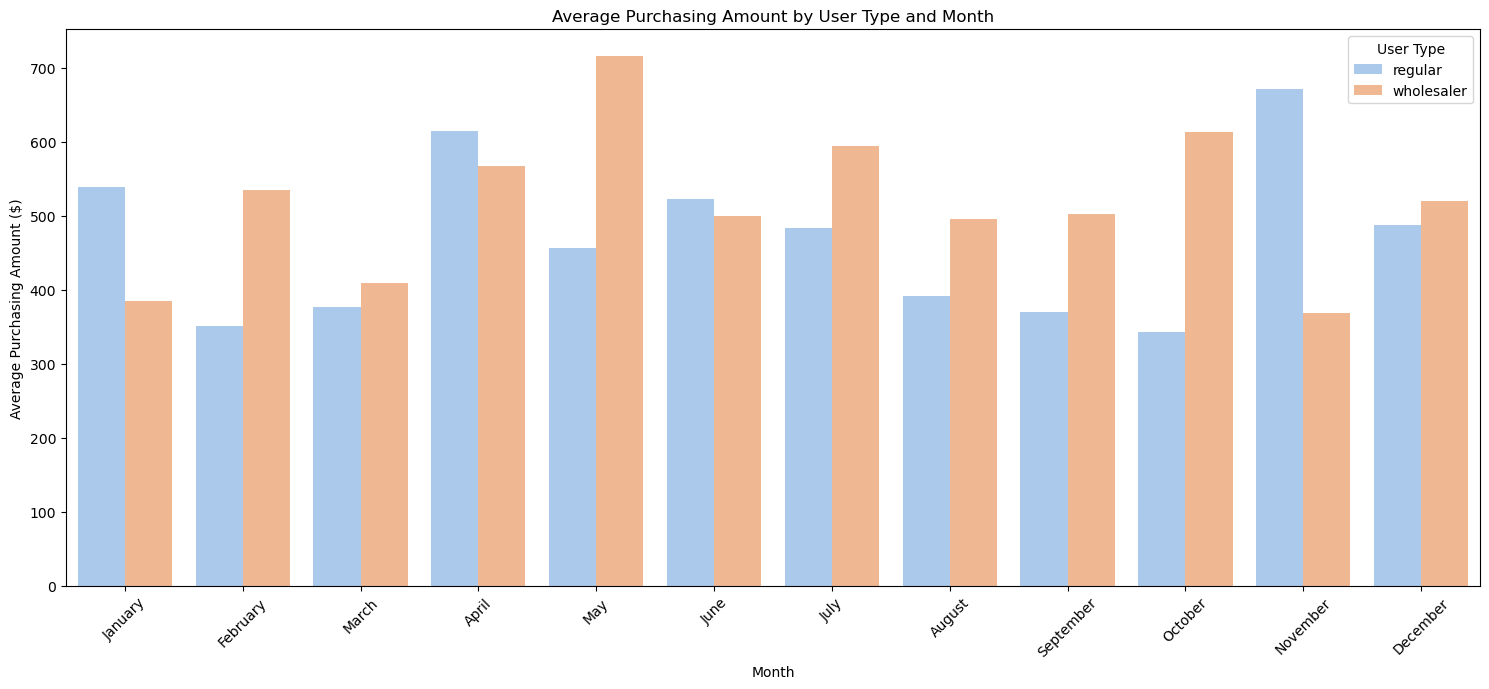

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merging the two dataframes on user id again
merged_df = pd.merge(df_transactions, df_users, left_on='Username', right_on='userid', how='left')

# Extracting the month from the Date_of_Transaction column
merged_df['Month'] = merged_df['Date_of_Transaction'].dt.month_name()

# Grouping by usertype and month to calculate the average purchasing amount for each month
avg_purchase_by_month_and_user = merged_df.groupby(['Month', 'usertype'])['Purchasing_Amount'].mean().reset_index()
# Defining the order of the months
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Ordering the months
avg_purchase_by_month_and_user['Month'] = pd.Categorical(avg_purchase_by_month_and_user['Month'], categories=order, ordered=True)
avg_purchase_by_month_and_user = avg_purchase_by_month_and_user.sort_values('Month')

# Plotting the data again
plt.figure(figsize=(15, 7))
sns.barplot(data=avg_purchase_by_month_and_user, x='Month', y='Purchasing_Amount', hue='usertype', palette='pastel')
plt.title('Average Purchasing Amount by User Type and Month')
plt.ylabel('Average Purchasing Amount ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting numeric features for clustering
data_for_clustering = df_users[['Kid_Age']]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster information to the dataframe
df_users['Cluster'] = clusters

C:\Users\Tony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Tony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tony\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


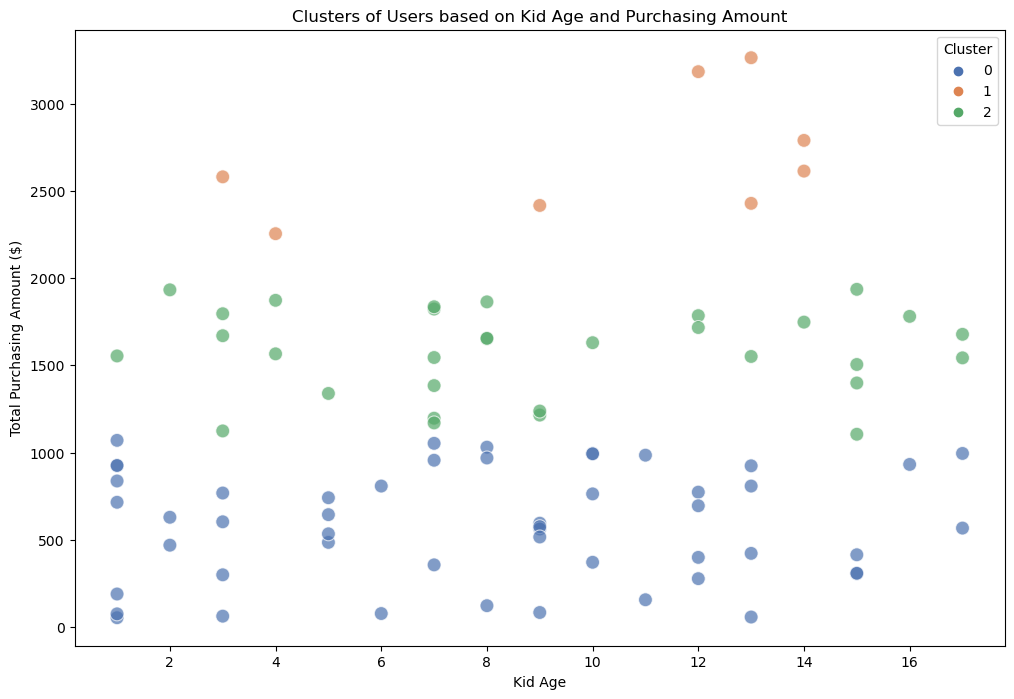

In [12]:
# Aggregating purchasing amount by user
agg_purchase = df_transactions.groupby('Username')['Purchasing_Amount'].sum().reset_index()

# Merging with df_users to get usertype and other details
merged_data = pd.merge(agg_purchase, df_users, left_on='Username', right_on='userid', how='left')

# Scaling the aggregated purchasing amount for clustering
data_for_clustering = merged_data[['Purchasing_Amount']]
scaled_purchase_data = scaler.fit_transform(data_for_clustering)

# Applying K-means with 3 clusters
clusters_purchase = kmeans.fit_predict(scaled_purchase_data)

# Adding the cluster information to the dataframe
merged_data['Cluster'] = clusters_purchase

plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='Kid_Age', y='Purchasing_Amount', hue='Cluster', palette='deep', s=100, alpha=0.7)
plt.title('Clusters of Users based on Kid Age and Purchasing Amount')
plt.xlabel('Kid Age')
plt.ylabel('Total Purchasing Amount ($)')
plt.legend(title='Cluster')
plt.show()